In [1]:
import torch
import random
import numpy as np
import pandas as pd
from transforms import val_transform
from dataset import TerminatorDataset
from torch.utils.data import DataLoader
from models.model_factory import load_model
from tcav import train_linear_classifier_from_concept
from sklearn.linear_model import LogisticRegression

from train import train
from models.model_factory import load_model
from visualization import visualize_hidden_activation
from torch.utils.data import Subset
from tcav import correct_labels_from_concept, get_tcav_score

import os
import shutil
import os.path as osp


from utils import (
    select_device, 
    read_labels,
    get_conceptdf,
)

### 1. Train Classifier

INFO:root:num_classes: 2
INFO:root:Model: efficientnetb0 loaded


Using device: cuda


INFO:root:Training Epoch 1/3
INFO:root:Epoch 1/3, Train Loss: 0.0593, Train Accuracy: 0.9743
INFO:root:Model saved in ../outputs/weights/efficientnetb0_epochs3/1.pth
INFO:root:Validation Epoch 1/3


Using device: cuda


INFO:root:Epoch 1/3, Validation Loss: 1.3826, Validation Accuracy: 0.8750
INFO:root:Training Epoch 2/3
INFO:root:Epoch 2/3, Train Loss: 0.0028, Train Accuracy: 1.0000
INFO:root:Model saved in ../outputs/weights/efficientnetb0_epochs3/2.pth
INFO:root:Validation Epoch 2/3


Using device: cuda


INFO:root:Epoch 2/3, Validation Loss: 1.3453, Validation Accuracy: 0.8750
INFO:root:Training Epoch 3/3
INFO:root:Epoch 3/3, Train Loss: 0.0008, Train Accuracy: 1.0000
INFO:root:Model saved in ../outputs/weights/efficientnetb0_epochs3/3.pth
INFO:root:Validation Epoch 3/3


Using device: cuda


INFO:root:Epoch 3/3, Validation Loss: 1.5835, Validation Accuracy: 0.8750


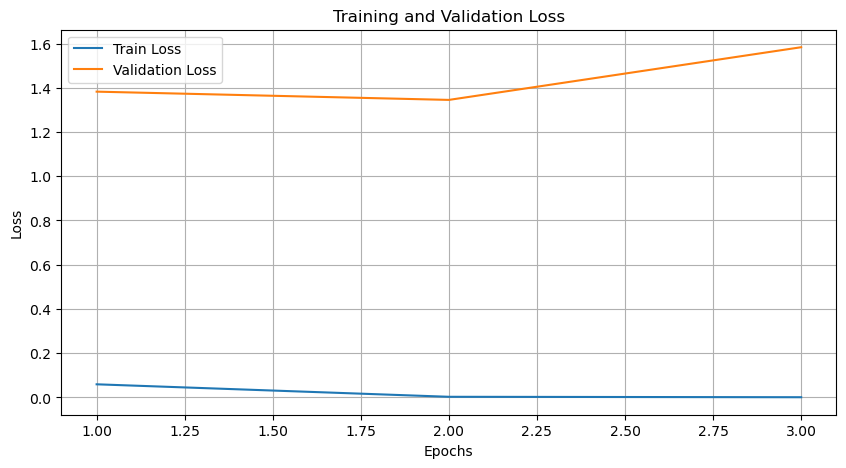

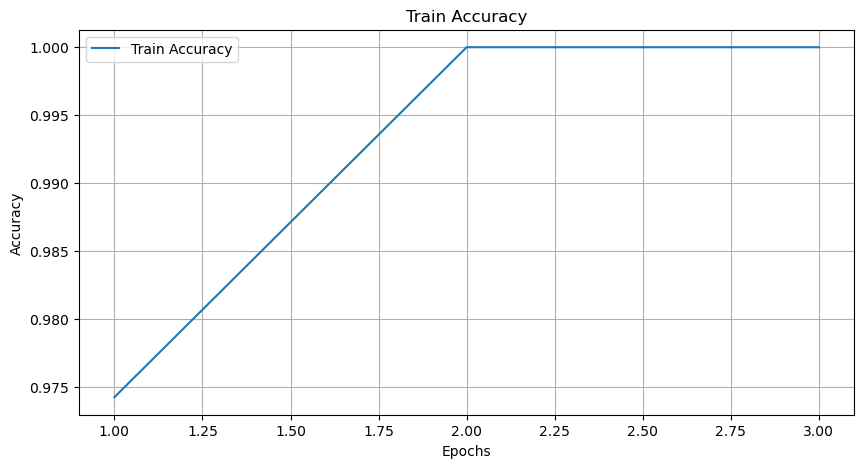

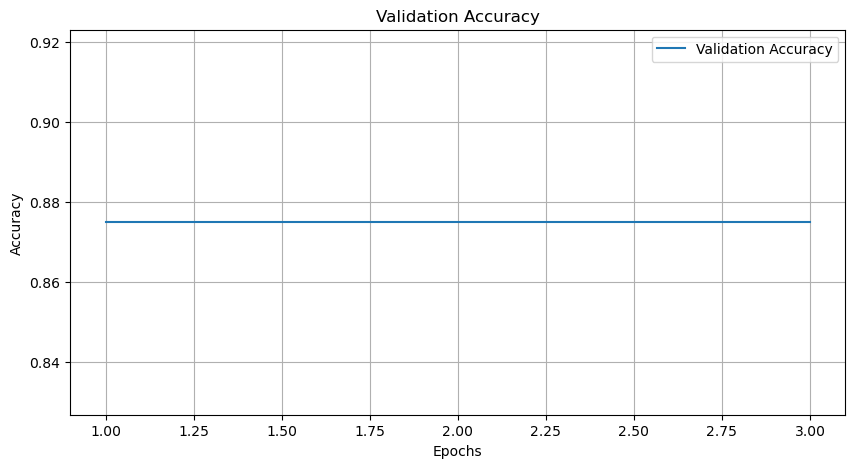

c:\Users\nicof\Desktop\Imperial\Imperial Internships\CODE\tenkys\src\models\model_factory.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.lo

In [2]:
images_dir = '../Dataset/'
val_labels = '../Dataset/test.csv'
train_labels_path = '../Dataset/train.csv'
model_name = 'efficientnetb0'
epochs = 3
num_classes = 2
weights_dir = train(model_name, epochs, images_dir, train_labels_path, val_labels)
model_path = f'{weights_dir}/{epochs}.pth'
model = load_model(model_name, num_classes, model_path)

### Visualize the model hidden activation map

Using device: cuda
Using device: cuda
Using device: cuda
Using device: cuda
Using device: cuda


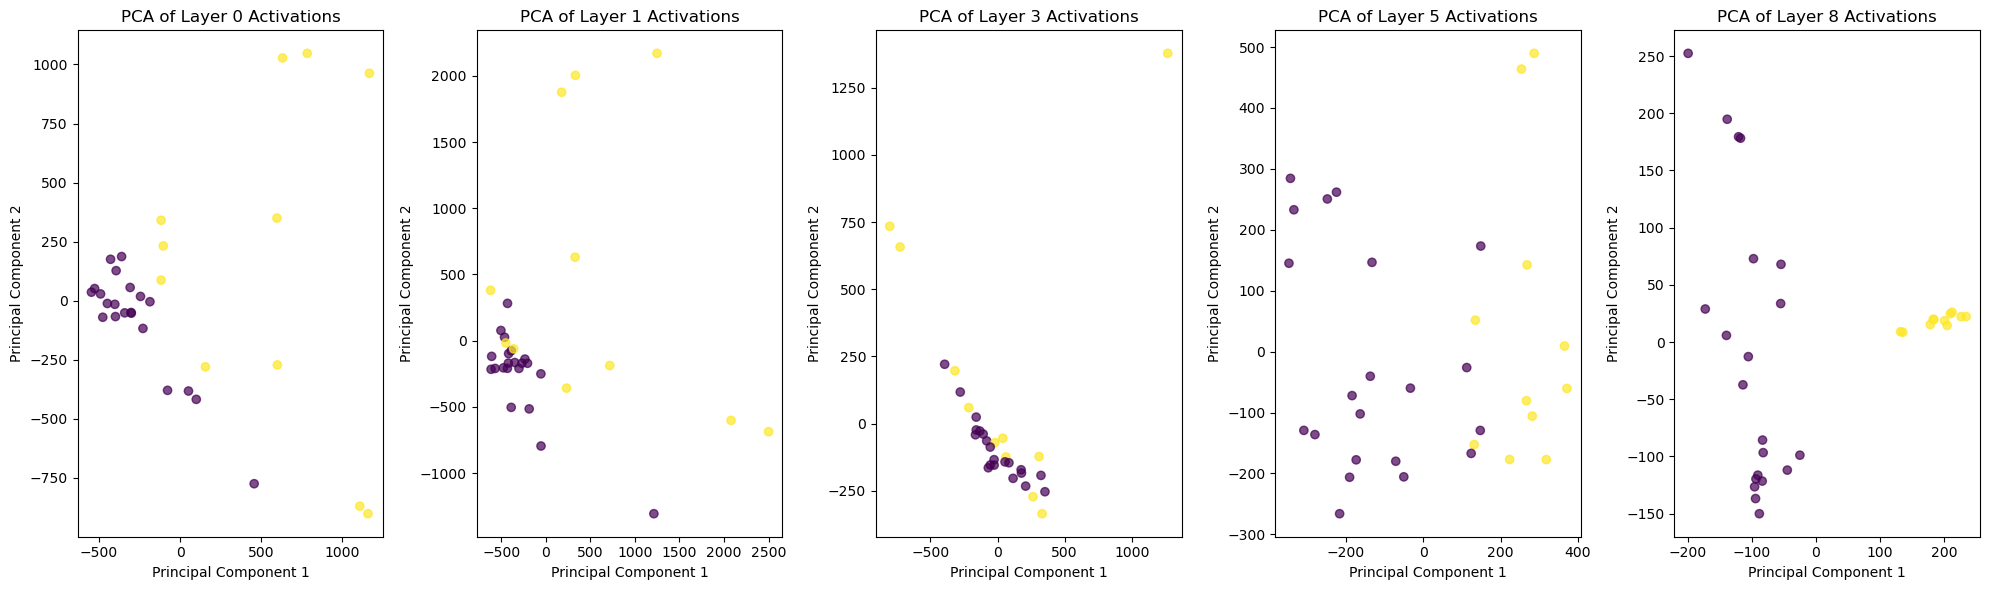

In [3]:
batch_size = 32
train_dataset = TerminatorDataset(images_dir, train_labels_path, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
# Limit to 32 samples for visualization
subset_indices = random.sample(range(len(train_dataset)), batch_size)
train_subset = Subset(train_dataset, subset_indices)
train_subset_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4)
layers_idx = [0, 1, 3, 5, 8]
visualize_hidden_activation(model, 'pca', layers_idx, train_subset_loader)

### Select Arnies for TCVA

ARNIES


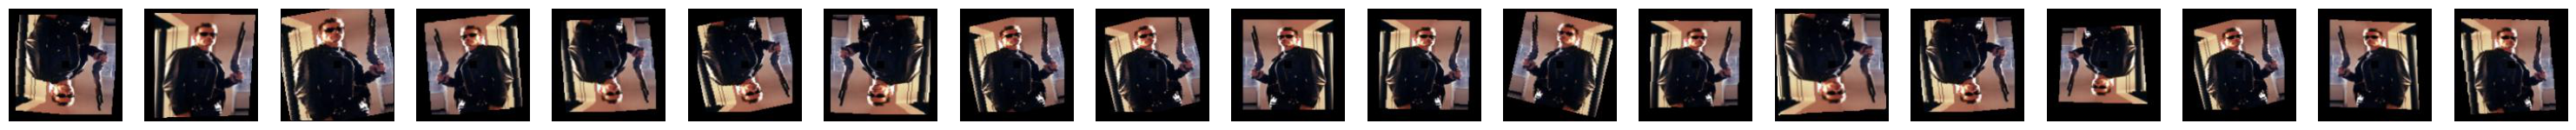

ENEMIES


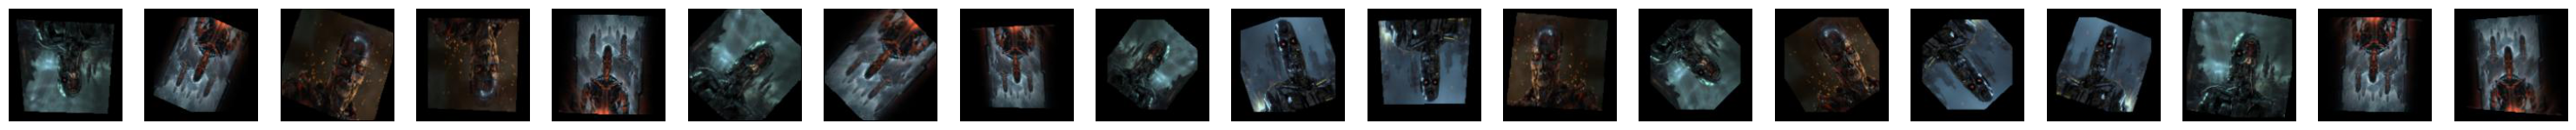

In [4]:
traindf = read_labels(train_labels_path)
train_dir = 'train/0\\'
arnies_files = ['0a073ede56c1426f87b6c019eb15d69c', '0c22224cae0e465aa38ee909bcf97792', '0cf8759b79334022b08e0c9085933810', '01a9bb53ce1e4c76a292f6dcf601dfc4', '1b279cec6efc4907be243845bf5cab48', '3beef9c012f24ab0abe790137d598bfd', '3fa77c3dd66841acad35ce85f8b657be', '4a589890c3b64d158788ed88893a7fb4', '6e38c35080334d69b40f8e2969940181', '8f0188ca1b4244f4a61ff901baf2a713', '1657dc6ff66740dbbb7d8267bebcbfbc', '2060e3b6a2ee49eb87c2dc7f8c7a3f85', '3110bc23839f44078917ec39e987604b', '4758b854721646fc8e7375ef451b25cf', '39040d038e9c4feba65f29aeef68d6a8', '52069c39e86e43dc96c0aac4573696af', '1806868b116647788aba3a4d98885dd4', 'aece1ad81ac94326907b9723539d7409', 'ba243618a24f4b39b7bb4b40790bd1b4']
print('ARNIES')
arnies = get_conceptdf(traindf, arnies_files, debug=True)
print('ENEMIES')
enemies_files = ['0a6ff2f1102d400c87ba2535238e2f1b', '0aa3d051bcc54dfa9d4faaf5b3bacc9e', '0b55b73fcba1493d8bc739ea1a5e86bb', '0c79135b2cfa4544b9c80645f2a5b650', '0ee40ee8d041499d9e99767564ef9db1',  '1ace21ffd2024fdaae3a42195bb38693', '2a59d3bf64d04d20a84fab40496b1302', '3e38a6dc18f34418a07dc848fe3b0ccf', '3e79c224af2d448da71c7d1793f68c80', '4a8c63ce5d97475e849277ed3d4e3c08', '4b96dd28fe234c9a9f3ff2e88ce23027', '6de4215584be477fafc5d6d905127f23', '7bb4ff1d9da04e5ca19eb67ac6580974', '7aa6f50a900942649a0a1b74ff0611ff', '7a758d5ba0a24d9c8bacb19d48283d31','07f4d5b2f71c4ac8982bfb87d46fce92', '7cdc8a849baf41d89727a44bfd8e214b', '36bba039d3f24461a1afff7649b32ec2', '033b634827e547669faec9be12bcfd92']
enemies = get_conceptdf(traindf, enemies_files, debug=True)
# store one csv with positive samples and one with negative samples
arnies.to_csv(f'{images_dir}/arnies.csv', header=False, index=False)
enemies.to_csv(f'{images_dir}/enemies.csv', header=False, index=False)

### Train TCAV to recognise the “Arnie concept”

In [5]:
# load datasets for positive and negative samples
images_dir = '../Dataset/'
arnies_labels = '../Dataset/arnies.csv'
enemies_labels = '../Dataset/enemies.csv'
batch_size = 19

arnies_dataset = TerminatorDataset(
    images_dir, 
    arnies_labels, 
    transform=val_transform
)
arnies_loader = DataLoader(
    arnies_dataset, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=4
)

enemies_dataset = TerminatorDataset(
    images_dir, 
    enemies_labels,
    transform=val_transform
)
enemies_loader = DataLoader(
    enemies_dataset, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=4
)
# focus on the closest layer to the output layer
layer_idx = len(model.backbone.features) - 1

Using device: cuda
Using device: cuda
Training accuracy: 1.0000


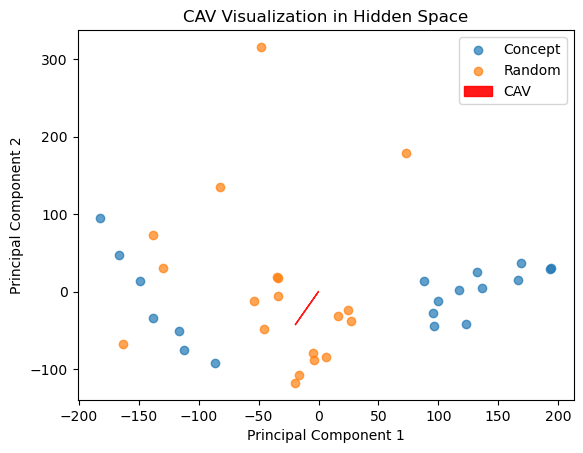

In [6]:
# train classifier with layer activations, arnies and enemies
clf = train_linear_classifier_from_concept(
    model, 
    arnies_loader, 
    enemies_loader, 
    layer_idx, 
    visualize=True,
    classifier='logistic'
    
)
# loaded_weights = np.load('../outputs/weights/logistic_regresion/weights.npy', allow_pickle=True).item()
# clf = LogisticRegression()
# clf.coef_ = loaded_weights["coef"]
# clf.intercept_ = loaded_weights["intercept"]

### Compute the TCAV score

In [7]:
tcav_score = get_tcav_score(model, clf, layer_idx, arnies_dataset)
# the concept is influencing the class 0 but not the class 1

Using device: cuda
Using device: cuda
TCAV score for target class 0: 1.0 
TCAV score for target class 1: 0.0 


### Change the labels of these images from “enemy” to “friend”.

In [8]:
new_train_labels_path, corrected_indexes = correct_labels_from_concept(
    model, 
    layer_idx, 
    clf, 
    train_dataset, 
    train_labels_path, 
)

Using device: cuda
Using device: cuda
labels saved in: ../Dataset/train_corrected.csv
172 labels corrected


c:\Users\nicof\Desktop\Imperial\Imperial Internships\CODE\tenkys\src\tcav.py:183: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corrected_labels = len(labels.iloc[arnies_indexes][labels['class']==0])


In [9]:
# copy corrected images to a new directory for revision
traindf = read_labels(train_labels_path)
corrected = traindf.iloc[corrected_indexes][traindf['class']==0]
save_dir = f'{images_dir}/arnies'
os.makedirs(save_dir, exist_ok=True)
for i, row in corrected.iterrows():
    impath = f'{images_dir}/{row["filename"]}'
    shutil.copy(impath, f'{save_dir}/{osp.basename(row["filename"])}')

C:\Users\nicof\AppData\Local\Temp\ipykernel_25416\1700684718.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corrected = traindf.iloc[corrected_indexes][traindf['class']==0]


### Train a new vision classification model on the fixed dataset 

INFO:root:num_classes: 2


Using device: cuda


INFO:root:Model: efficientnetb0 loaded
INFO:root:Training Epoch 1/3
INFO:root:Epoch 1/3, Train Loss: 0.1289, Train Accuracy: 0.9589
INFO:root:Model saved in ../outputs/weights/efficientnetb0_epochs3_corrected/1.pth
INFO:root:Validation Epoch 1/3


Using device: cuda


INFO:root:Epoch 1/3, Validation Loss: 0.0108, Validation Accuracy: 1.0000
INFO:root:Training Epoch 2/3
INFO:root:Epoch 2/3, Train Loss: 0.0863, Train Accuracy: 0.9749
INFO:root:Model saved in ../outputs/weights/efficientnetb0_epochs3_corrected/2.pth
INFO:root:Validation Epoch 2/3


Using device: cuda


INFO:root:Epoch 2/3, Validation Loss: 0.0286, Validation Accuracy: 1.0000
INFO:root:Training Epoch 3/3
INFO:root:Epoch 3/3, Train Loss: 0.0674, Train Accuracy: 0.9779
INFO:root:Model saved in ../outputs/weights/efficientnetb0_epochs3_corrected/3.pth
INFO:root:Validation Epoch 3/3


Using device: cuda


INFO:root:Epoch 3/3, Validation Loss: 0.0086, Validation Accuracy: 1.0000


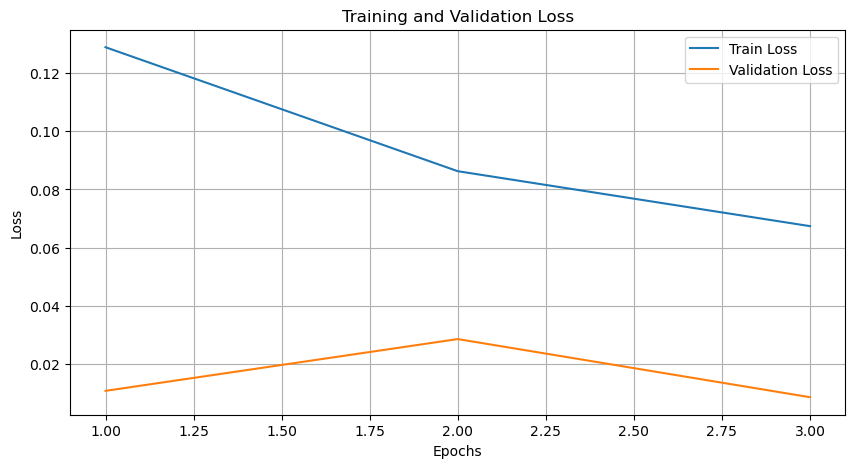

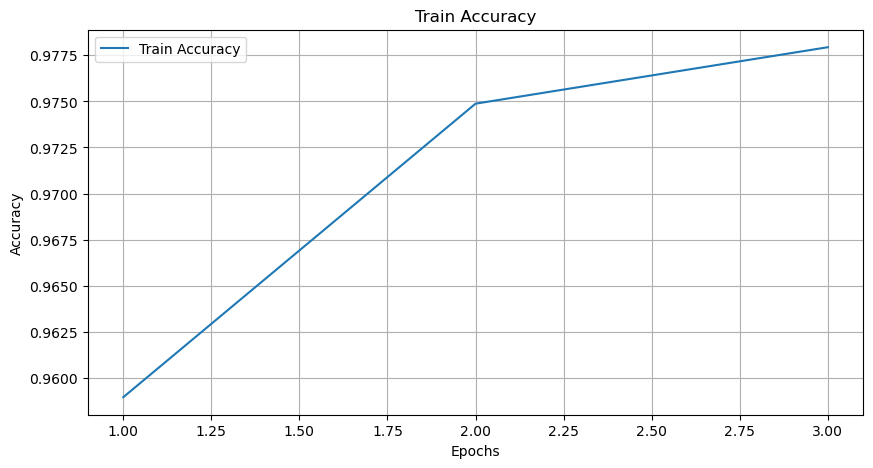

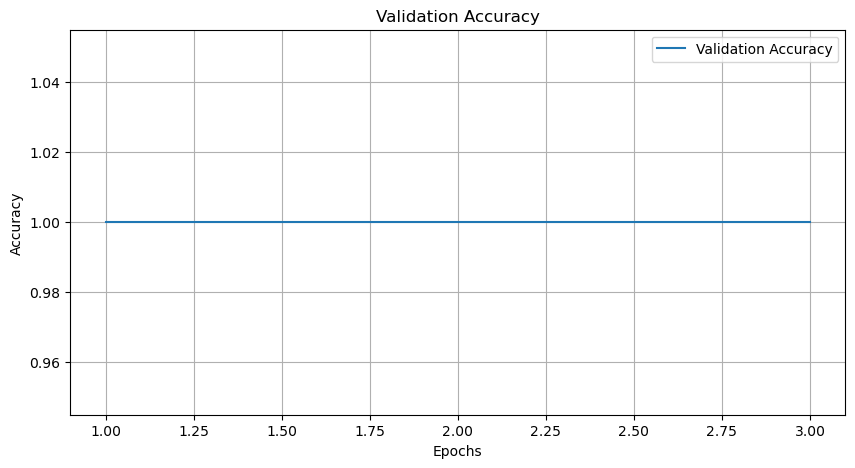

c:\Users\nicof\Desktop\Imperial\Imperial Internships\CODE\tenkys\src\models\model_factory.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.lo

In [10]:
model_name = 'efficientnetb0'
epochs = 3
num_classes = 2
add_info = 'corrected'
weights_dir = train(model_name, epochs, images_dir, new_train_labels_path, val_labels, add_info)
model_path = f'{weights_dir}/{epochs}.pth'
new_model = load_model(model_name, num_classes, model_path)

### The new accuracy is 100%!

### Extra Mile
This repository goes the extra mile by allowing experimentation with three different architectures: EfficientNetB0, RegNet400, ResNet18 and ViT. This can be achieved by modifying the model_name variable.

The activation layer used can be changed by setting the layer_idx variable.

### Additional information
The images in the dataset are not moved during the correction process. Instead, a dataframe is created containing the filenames and their corresponding classes.